In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import numpy as np

In [12]:
plot_dir = Path("plots")
plot_dir.mkdir(exist_ok=True)

### Visualize predictions on separate subplots

Please put test set predictions and targets in some folder and set it below.

The subplot names are given based on the file names.

In [13]:
pred_dir = Path("..\sindy\compare_models")
pred_files = pred_dir.glob("*.csv")

# Create a dictionary to store the dataframes
pred_dict = {}

for pred_file in pred_files:
    # Read the csv file
    df = pd.read_csv(pred_file)
    # Get the model name
    model_name = pred_file.stem
    # Store the dataframe in the dictionary
    pred_dict[model_name] = df

print(pred_dict.keys())

dict_keys(['cfc_preds', 'sindy_preds', 'targets'])


In [14]:
pred_dict["targets"].head()

,0,1,2,3,4,5,6,7,8
0,9.093140e-07,0.000000,0.0,0.0,0.0,0.0,0.0,0.000337,0.000000e+00
1,8.307309e-05,0.000000,0.0,0.0,0.0,0.0,0.0,0.011169,8.183155e-07
2,2.809107e-03,0.000000,0.0,0.0,0.0,0.0,0.0,0.136060,7.394133e-05
3,3.601892e-02,0.000000,0.0,0.0,0.0,0.0,0.0,0.608625,2.453229e-03
4,1.845735e-01,0.000002,0.0,0.0,0.0,0.0,0.0,0.999664,2.988638e-02


In [15]:
custom_colors = sns.color_palette("tab10")

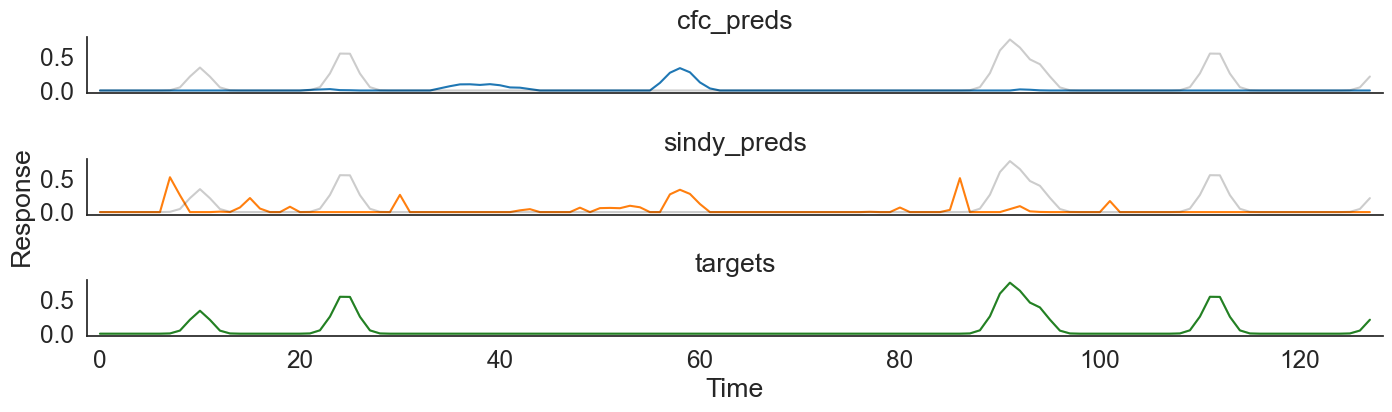

In [19]:
# Plot the predictions on separate subplots using seaborn

# Set the style
sns.set_context("paper")
# Set font_scale according to needs
sns.set(style="white", font_scale=1.6)

# Create a figure and axis
n_subplots = len(pred_dict)
fig, axes = plt.subplots(
    n_subplots,
    1,
    figsize=(
        14,
        1.5 * n_subplots,
    ),
    sharey=True,
)

# Select output channel
output_channel = "3"

# Iterate over the dictionary
for i, (model_name, df) in enumerate(pred_dict.items()):
    # Create a scatter plot
    x_axis_values = df[output_channel].index
    sns.lineplot(
        x=x_axis_values, y=output_channel, data=df, ax=axes[i], color=custom_colors[i]
    )
    # Plot the target values in background
    # Adjust data frame length
    target_df = pred_dict["targets"].iloc[: len(df)]
    sns.lineplot(
        x=target_df.index,
        y=output_channel,
        data=target_df,
        ax=axes[i],
        color="black",
        alpha=0.2,
    )
    # Add a title
    axes[i].set_title(model_name)
    axes[i].get_xaxis().set_visible(False)
    axes[i].set_ylabel("")
    axes[i].margins(x=0.01)

# Set x axis label for the last subplot
axes[-1].get_xaxis().set_visible(True)
axes[-1].set_xlabel("Time")

# Set y axis label for the figure
fig.text(-0.001, 0.5, "Response", va="center", rotation="vertical")

# Set fig title
# fig.suptitle(f"Predictions for output channel {output_channel}", fontsize=18)

sns.despine()
# Adjust the layout
plt.tight_layout()
plt.show()

fig.savefig(plot_dir / "predictions.png", bbox_inches="tight")